In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

In [2]:
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    print(state)

original
[1.+0.j 0.+0.j]
insert x gate
[0.+0.j 1.+0.j]
insert x gate to return to original
[1.+0.j 0.+0.j]
insert h gate to flip x and z axis
[0.70710678+0.j 0.70710678+0.j]
insert x gate to show no change
[0.70710678+0.j 0.70710678+0.j]
insert h gate to return to original
[1.+0.j 0.+0.j]
insert iden gate to show no change
[1.+0.j 0.+0.j]
insert z gate to show no change
[1.+0.j 0.+0.j]
insert h gate
[0.70710678+0.j 0.70710678+0.j]
insert z gate
[ 0.70710678+0.j -0.70710678+0.j]
insert h gate
[0.+0.j 1.+0.j]
insert x gate to return to original
[1.+0.j 0.+0.j]
insert rx gate
[0.70710678+0.j         0.        -0.70710678j]
insert rx gate to return to axis
[-1.+0.j  0.+0.j]
insert ry gate
[-0.92387953+0.j -0.38268343+0.j]
insert ry gate to return to axis
[1.+0.j 0.+0.j]
test to show change in Bloch sphere


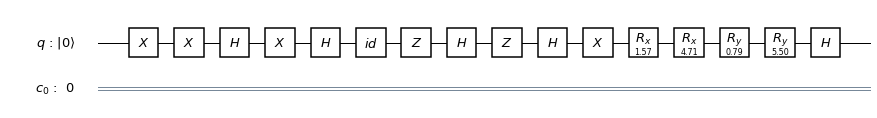

In [3]:
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q, c)
print("original")
stater(qc)
print("insert x gate")
qc.x(q[0])
stater(qc)
print("insert x gate to return to original")
qc.x(q[0])
stater(qc)
print("insert h gate to flip x and z axis")
qc.h(q[0])
stater(qc)
print("insert x gate to show no change")
qc.x(q[0])
stater(qc)
print("insert h gate to return to original")
qc.h(q[0])
stater(qc)
print("insert iden gate to show no change")
qc.iden(q)
stater(qc)
print("insert z gate to show no change")
qc.z(q[0])
stater(qc)
print("insert h gate")
qc.h(q[0])
stater(qc)
print("insert z gate")
qc.z(q[0])
stater(qc)
print("insert h gate")
qc.h(q[0])
stater(qc)
print("insert x gate to return to original")
qc.x(q[0])
stater(qc)
print("insert rx gate")
qc.rx(pi/2,q)
stater(qc)
print("insert rx gate to return to axis")
qc.rx(3*pi/2,q)
stater(qc)
print("insert ry gate")
qc.ry(pi/4,q)
stater(qc)
print("insert ry gate to return to axis")
qc.ry(7*pi/4,q)
stater(qc)
print("test to show change in Bloch sphere")
qc.h(q)
qc.draw(output='mpl')

In [4]:
# from https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/002-The_Weird_and_Wonderful_World_of_the_Qubit/005-The_Bloch_Sphere.html
meas_x = QuantumCircuit(q, c)
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []

for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u1(phase, q)
    circuits.append(qc + middle + meas_x)
    circuits.append(qc + middle + meas_y)
    circuits.append(qc + middle + meas_z)
    
job = execute(circuits,
              backend = Aer.get_backend('qasm_simulator'),
              shots=1024)
result = job.result()

for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1

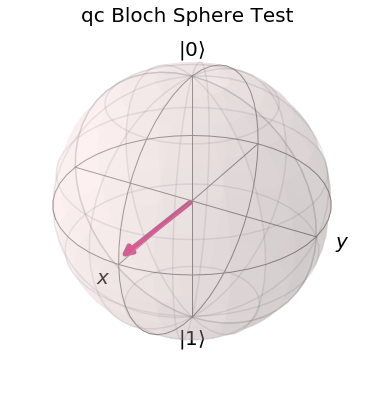

In [5]:
plot_bloch_vector(bloch, title='qc Bloch Sphere Test')
#this graph is the result of the qc circuit of one qubit

In [6]:
# from https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/002-The_Weird_and_Wonderful_World_of_the_Qubit/005-The_Bloch_Sphere.html
w = QuantumRegister(1, 'w')
v = ClassicalRegister(1, 'v')
wv = QuantumCircuit(w, v)



print("original")
stater(wv)
print("insert x gate")
wv.x(w[0])
stater(wv)
print("insert x gate to return to original")
wv.x(w[0])
stater(wv)
print("insert h gate to flip x and z axis")
wv.h(w[0])
stater(wv)
print("insert x gate to show no change")
wv.x(w[0])
stater(wv)
print("insert h gate to return to original")
wv.h(w[0])
stater(wv)
print("insert iden gate to show no change")
wv.iden(w)
stater(wv)
print("insert z gate to show no change")
wv.z(w[0])
stater(wv)
print("insert h gate")
wv.h(w[0])
stater(wv)
print("insert z gate")
wv.z(w[0])
stater(wv)
print("insert h gate")
wv.h(w[0])
stater(wv)
print("insert x gate to return to original")
wv.x(w[0])
stater(wv)
print("insert rx gate")
wv.rx(pi/2,w)
stater(wv)
print("insert rx gate to return to axis")
wv.rx(3*pi/2,w)
stater(wv)
print("insert ry gate")
wv.ry(pi/4,w)
stater(wv)
print("insert ry gate to return to axis")
wv.ry(7*pi/4,w)
stater(wv)
print("test to show change in Bloch sphere")
wv.h(w)
wv.z(w)

meas_x = QuantumCircuit(w, v)
meas_x.rx(pi/2, w)
meas_x.h(w)
meas_x.measure(w, v)

meas_y = QuantumCircuit(w, v)
meas_y.s(w).inverse()
meas_y.rx(pi/2, w)
meas_y.h(w)
meas_y.measure(w, v)

meas_z = QuantumCircuit(w, v)
meas_z.measure(w, v)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []

for exp_index in exp_vector:
    middle = QuantumCircuit(w, v)
    phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u1(phase, w)
    circuits.append(wv + middle + meas_x)
    circuits.append(wv + middle + meas_y)
    circuits.append(wv + middle + meas_z)
    
job = execute(circuits,
              backend = Aer.get_backend('qasm_simulator'),
              shots=1024)
result = job.result()

for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1

original
[1.+0.j 0.+0.j]
insert x gate
[0.+0.j 1.+0.j]
insert x gate to return to original
[1.+0.j 0.+0.j]
insert h gate to flip x and z axis
[0.70710678+0.j 0.70710678+0.j]
insert x gate to show no change
[0.70710678+0.j 0.70710678+0.j]
insert h gate to return to original
[1.+0.j 0.+0.j]
insert iden gate to show no change
[1.+0.j 0.+0.j]
insert z gate to show no change
[1.+0.j 0.+0.j]
insert h gate
[0.70710678+0.j 0.70710678+0.j]
insert z gate
[ 0.70710678+0.j -0.70710678+0.j]
insert h gate
[0.+0.j 1.+0.j]
insert x gate to return to original
[1.+0.j 0.+0.j]
insert rx gate
[0.70710678+0.j         0.        -0.70710678j]
insert rx gate to return to axis
[-1.+0.j  0.+0.j]
insert ry gate
[-0.92387953+0.j -0.38268343+0.j]
insert ry gate to return to axis
[1.+0.j 0.+0.j]
test to show change in Bloch sphere


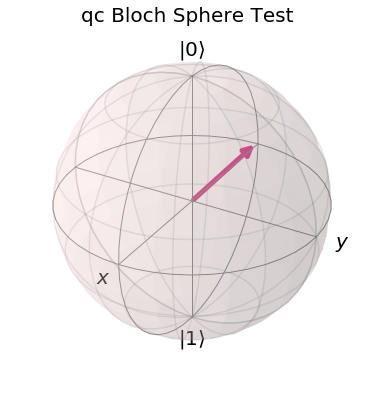

In [7]:
plot_bloch_vector(bloch, title='qc Bloch Sphere Test')
#this graph is the result of the qc circuit of one qubit